# Credit Card Fraud Detection Capstone Project

### Lets Import important libraries which we will be using in this Capstone Project

In [1]:
## Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

In [2]:
os.getcwd()

'C:\\Users\\srashid\\OneDrive - EBSCO Industries\\FindDefault'

In [3]:
os.chdir('C:\\Users\\srashid\\Downloads\\Python')

In [4]:
## Reading the Dataset
df = pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#### 'Class' column is the target column in which 0 denotes not fraud and 1 denotes fraud.

### Exploratory Data Analysis

In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.758702e-12,-8.252296e-13,-9.637438e-13,8.316234e-13,1.592013e-13,4.247308e-13,-3.050183e-13,8.692882e-14,-1.179710e-12,...,-3.406538e-13,-5.713357e-13,-9.725290e-13,1.464144e-12,-6.989090e-13,-5.615254e-13,3.332111e-12,-3.518885e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### The dataset doesnot have any null value

In [10]:
df_corr = df.corr()

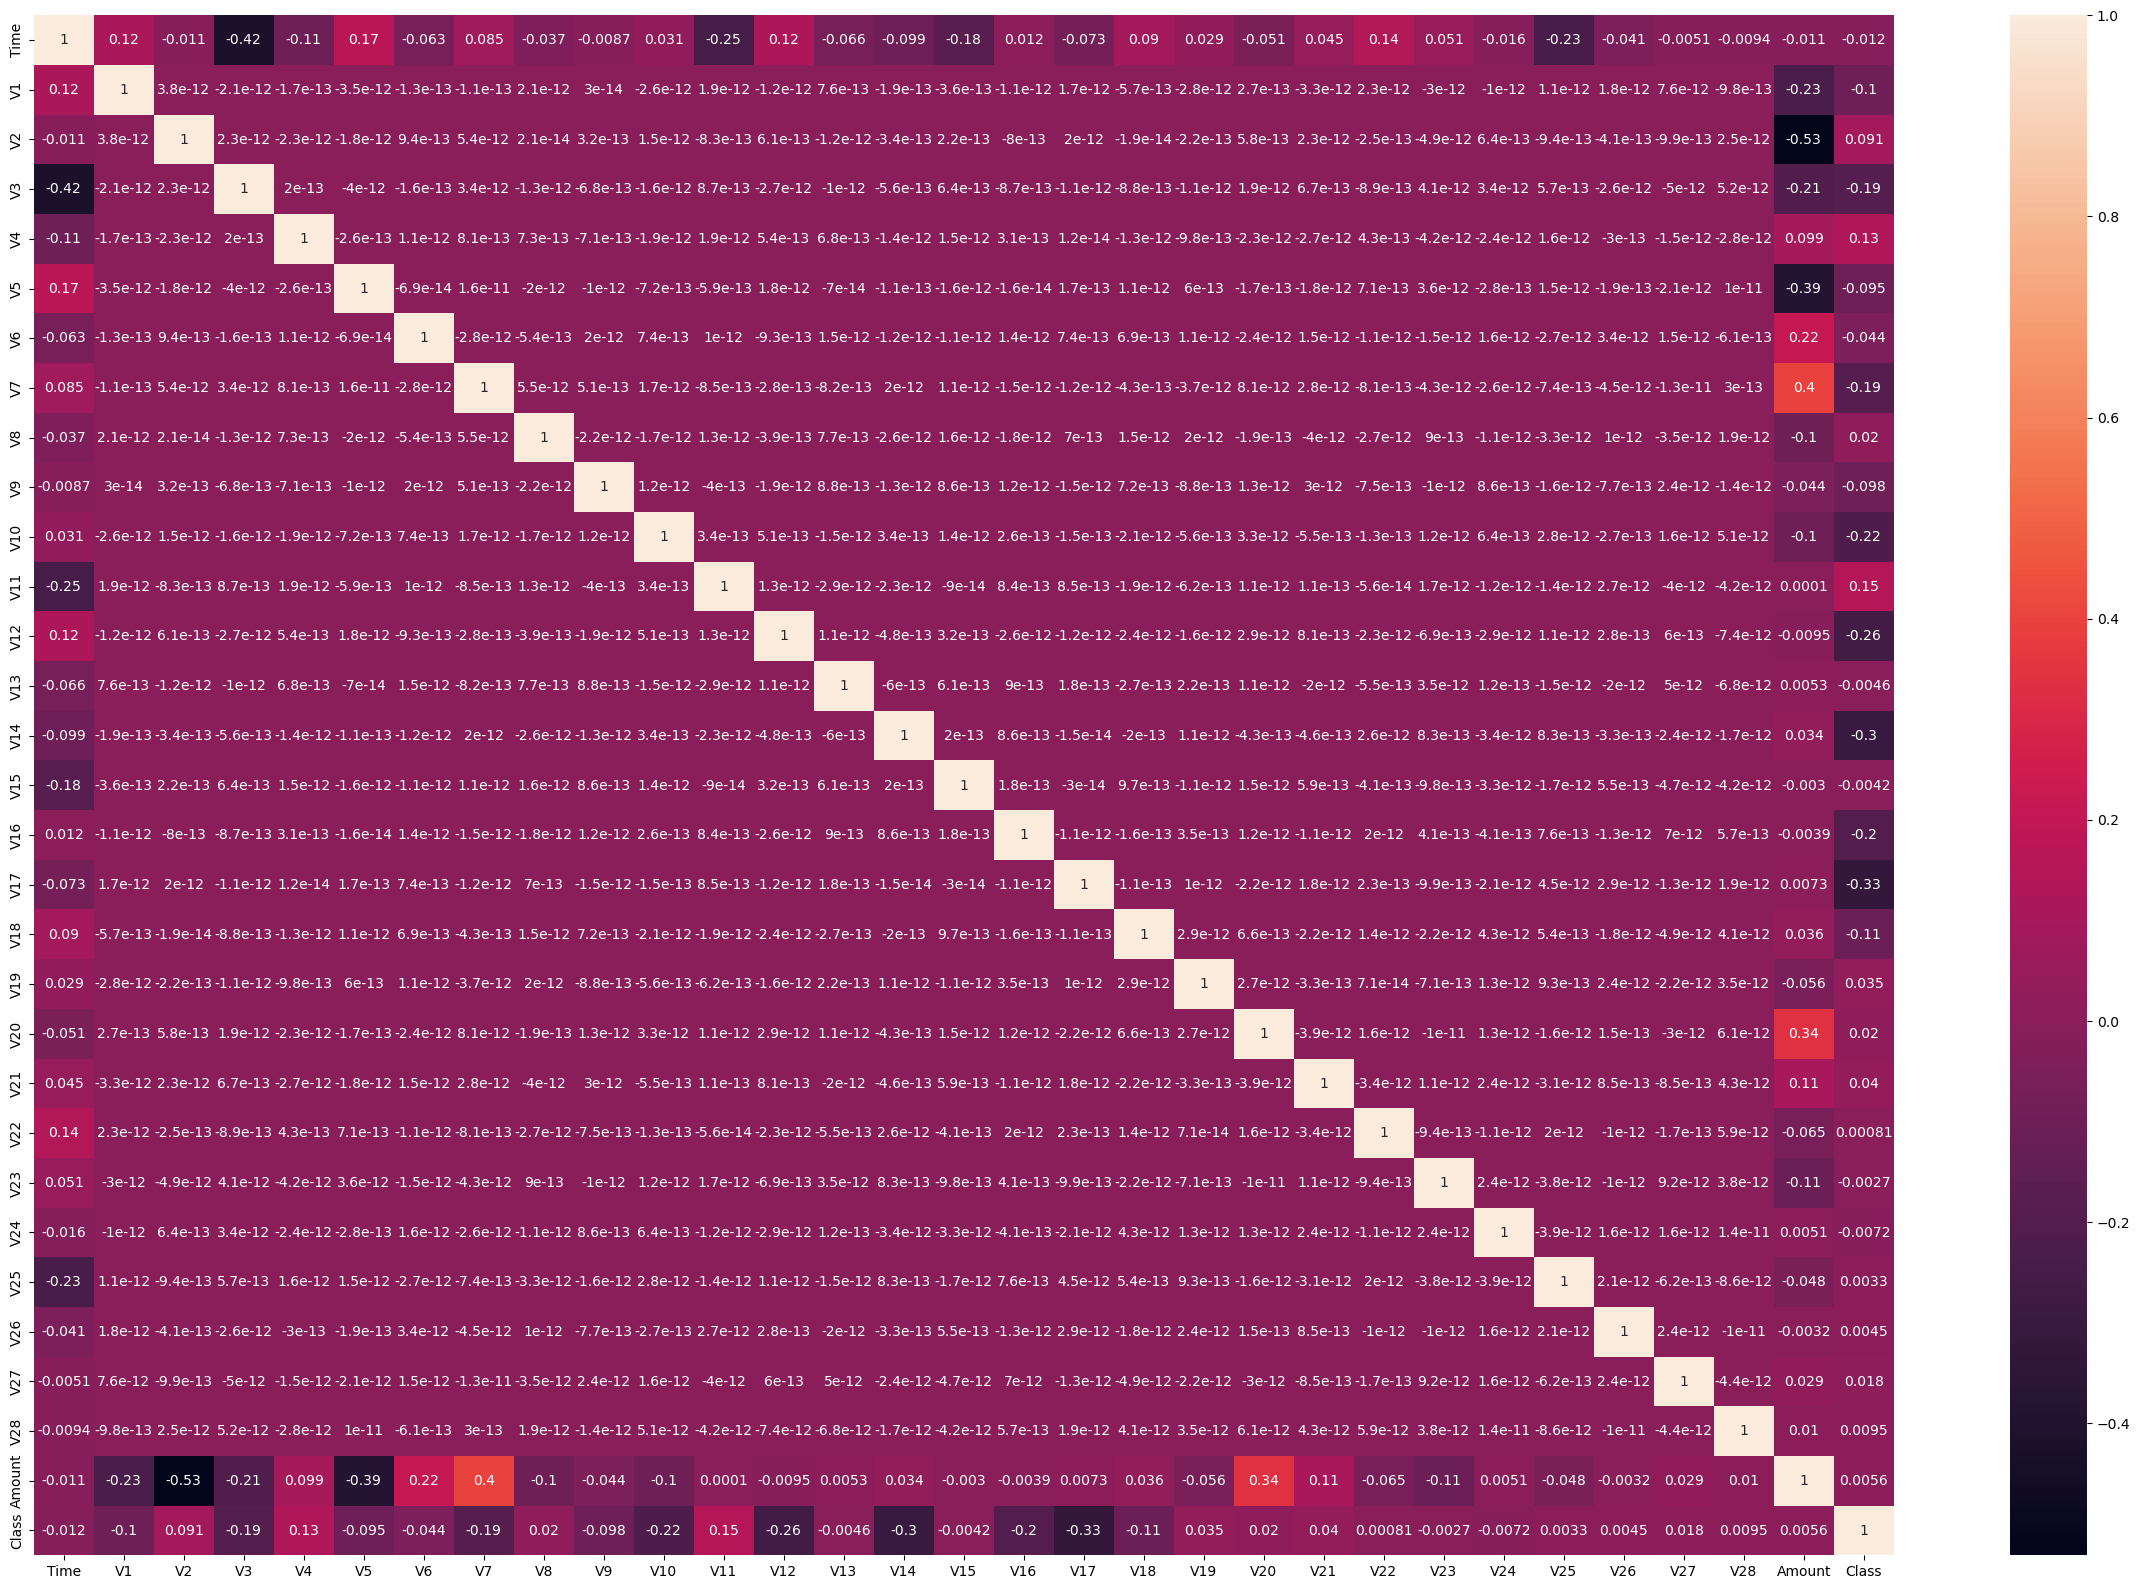

In [11]:
plt.figure(figsize=(30,20))
sns.heatmap(df_corr, annot=True)
plt.show()

C:\Users\srashid\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


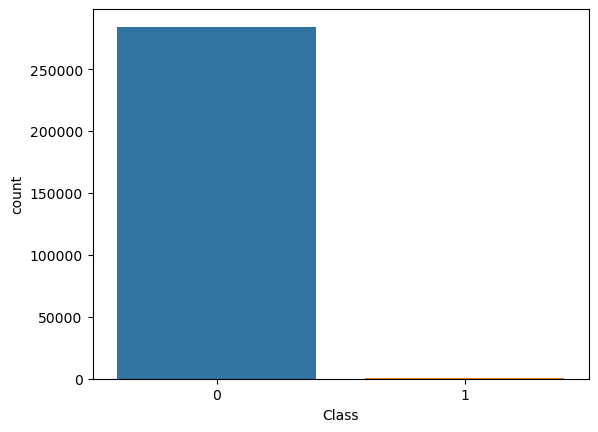

In [12]:
sns.countplot(df['Class'])
plt.show()

#### By looking at the graph we can see the imbalance in the data. The data is skewed towards the normal transaction.

In [13]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

#### Only 492 instances of fraud out of 284807 instances

In [14]:
print('Percent of fraud transaction: ',len(df[df['Class']==1])/len(df['Class'])*100,"%")
print('Percent of normal transaction: ',len(df[df['Class']==0])/len(df['Class'])*100,"%")

Percent of fraud transaction:  0.1727485630620034 %
Percent of normal transaction:  99.82725143693798 %


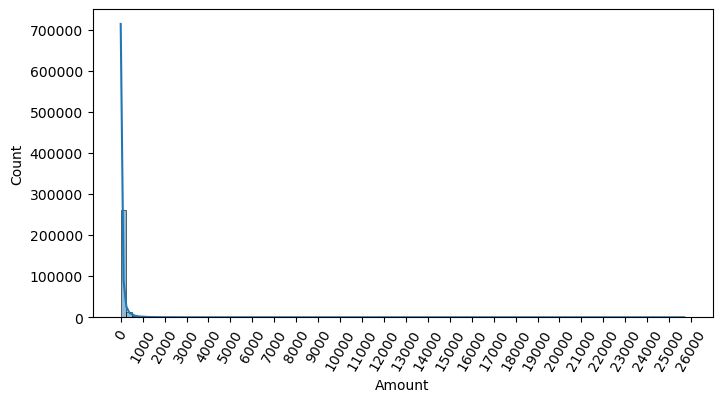

In [15]:
plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.histplot(df['Amount'], bins=100, kde=True)
plt.show()

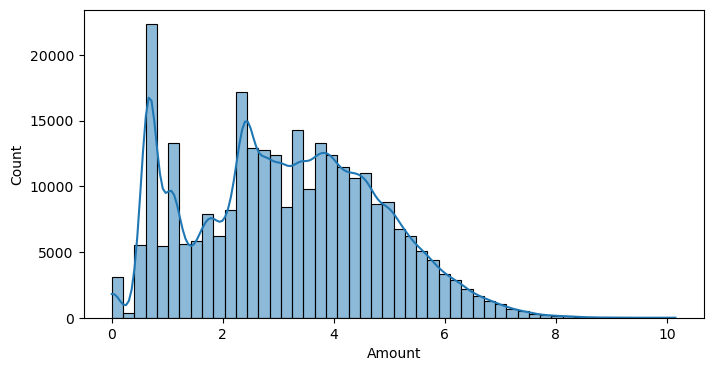

In [16]:
plt.figure(figsize=(8, 4))
sns.histplot(np.log1p(df['Amount']), bins=50, kde=True)
plt.show()

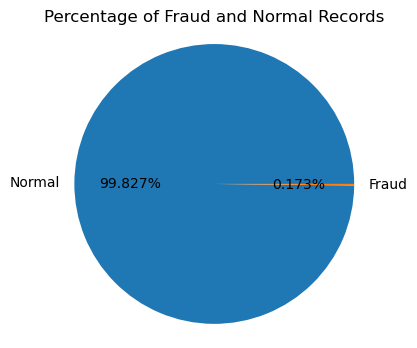

In [17]:
#find percentage of fraud/non_fraud records
fraud_percentage = (df.groupby('Class')['Class'].count() / df['Class'].count()) * 100

plt.figure(figsize=(5, 4))
plt.pie(fraud_percentage, labels=['Normal', 'Fraud'], autopct='%0.3f%%')
plt.title('Percentage of Fraud and Normal Records')
plt.axis('equal')
plt.show()

#### Abount 0.17% transactions are fradulent

In [18]:
imbalance_data = round(df['Class'].value_counts()[1]/df['Class'].value_counts()[0] * 100,3)
print(f'The ratio of imbalance: {imbalance_data}%')

The ratio of imbalance: 0.173%


In September 2013, the dataset captures credit card transactions conducted by European cardholders over a span of two days. Among the 284,807 transactions recorded, there were 492 instances of fraud. Notably, frauds represent a mere 0.173% of the total transactions, indicating a highly imbalanced dataset.

In [19]:
amount_class = df.groupby('Class')['Amount'].sum()
amount_class

Class
0    25102462.04
1       60127.97
Name: Amount, dtype: float64

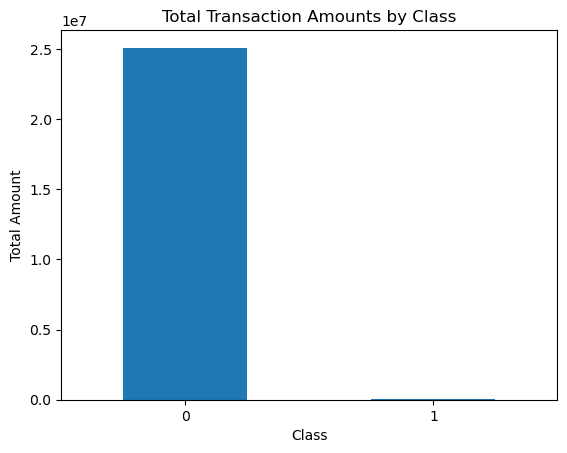

In [20]:
amount_class.plot(kind='bar')
plt.title('Total Transaction Amounts by Class')
plt.xlabel('Class')
plt.ylabel('Total Amount')
plt.xticks(rotation=0)
plt.show()

#### Fraudulent Transactions amount are negligible 

### Lets check the outliers

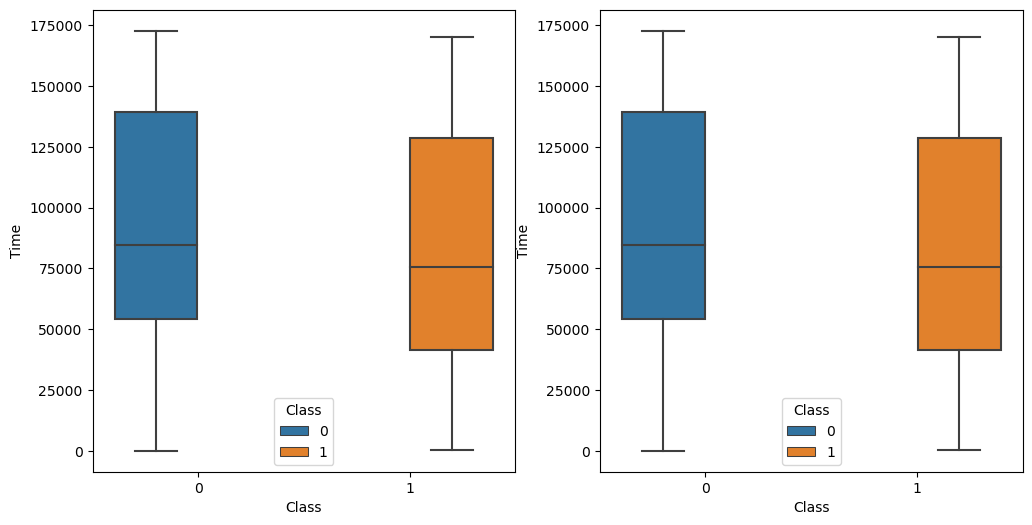

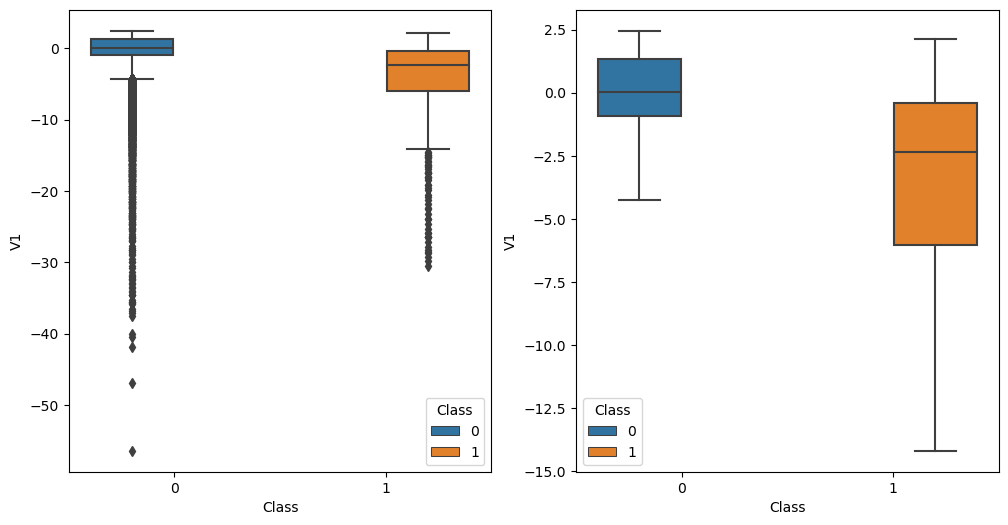

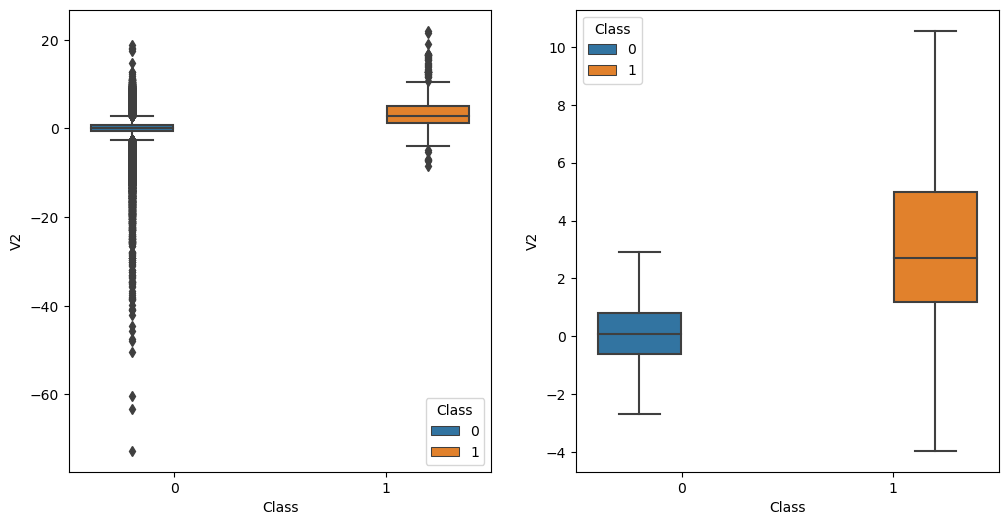

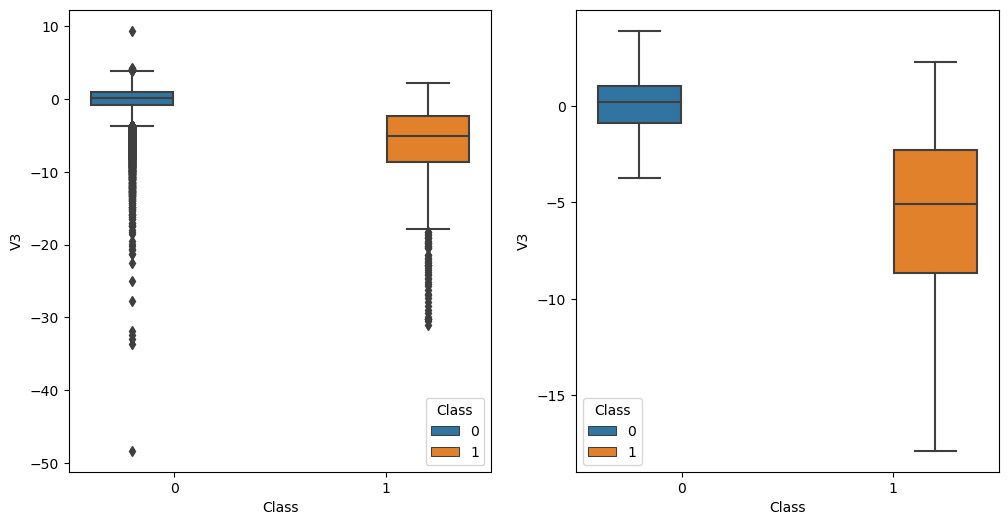

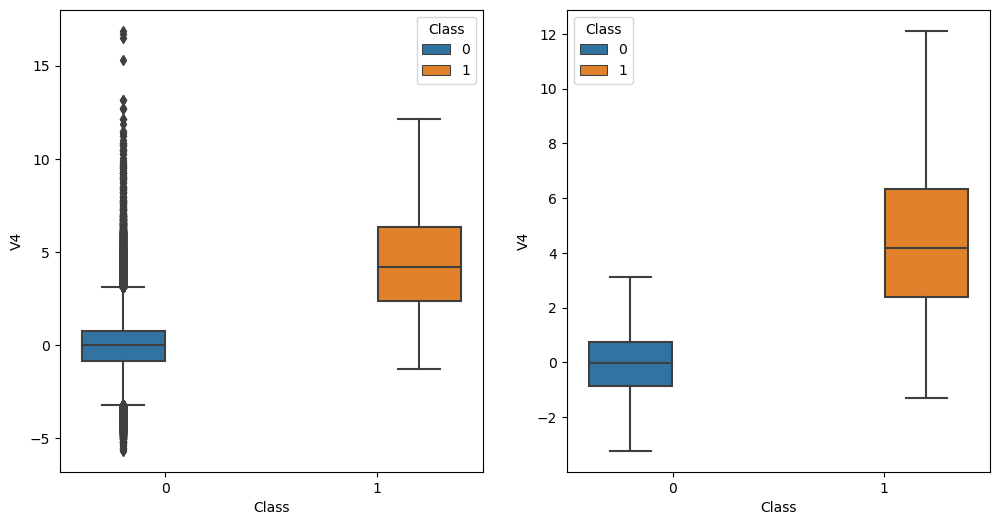

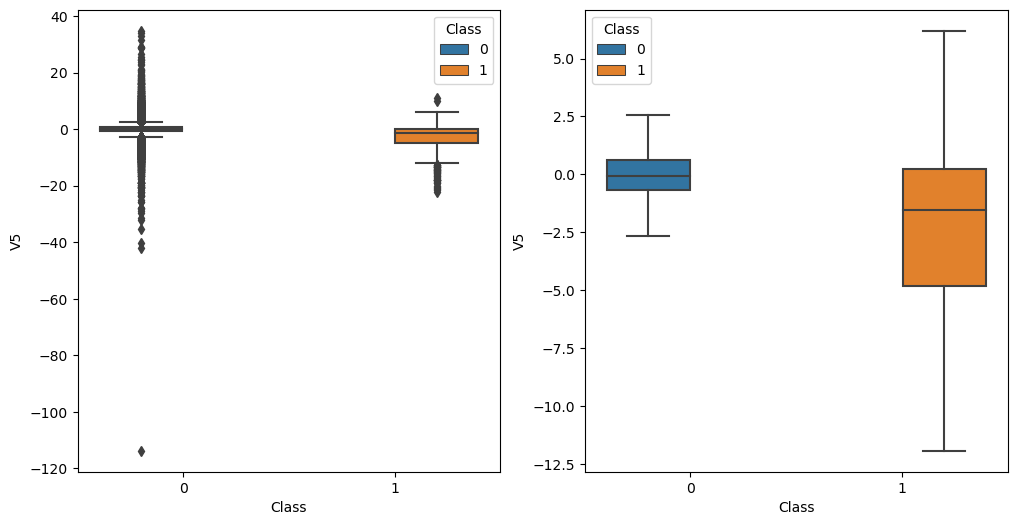

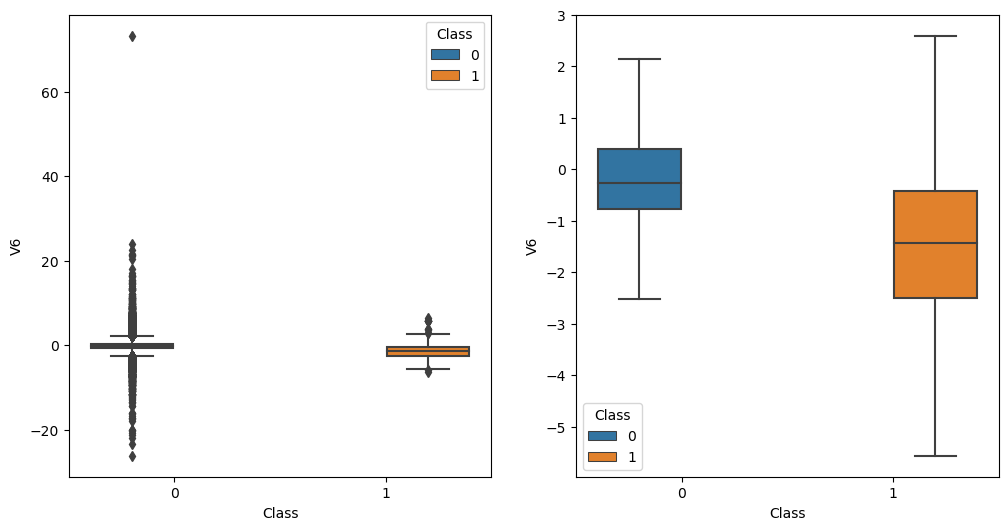

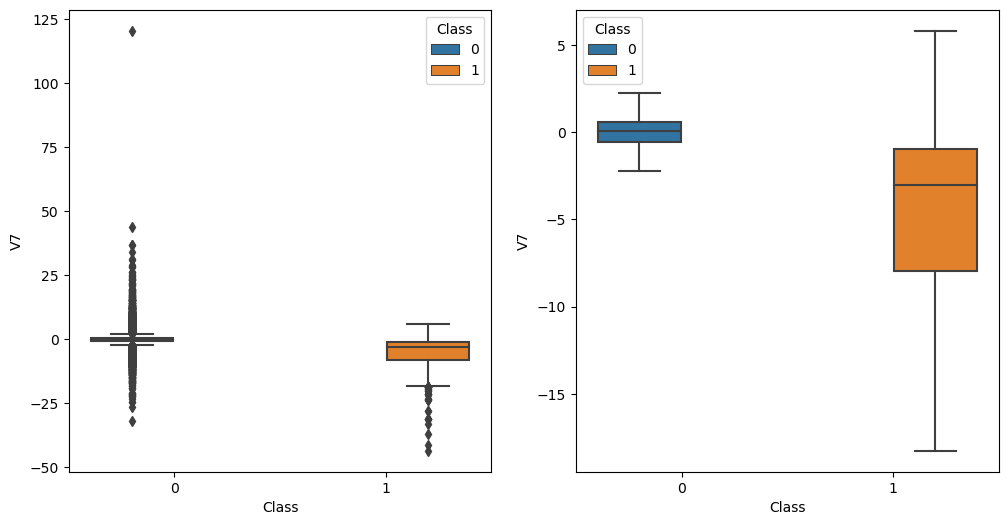

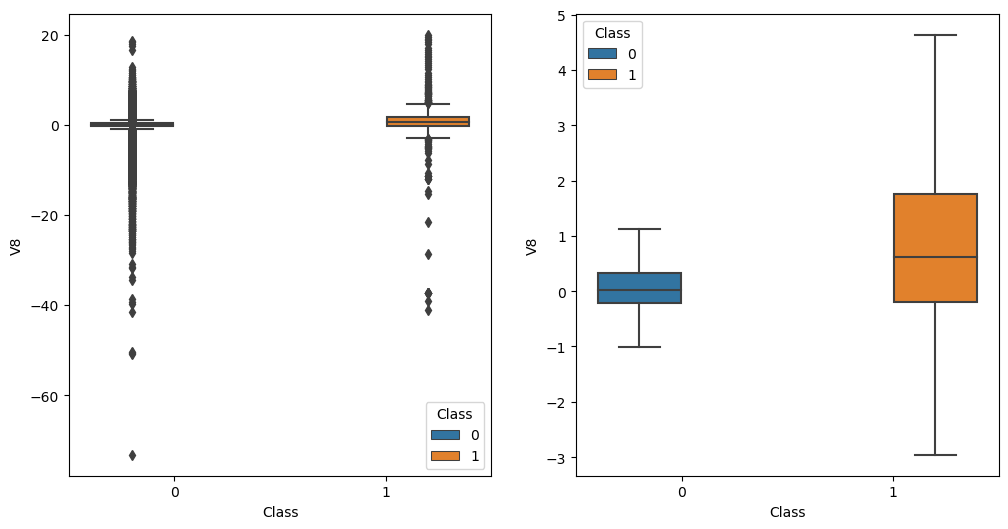

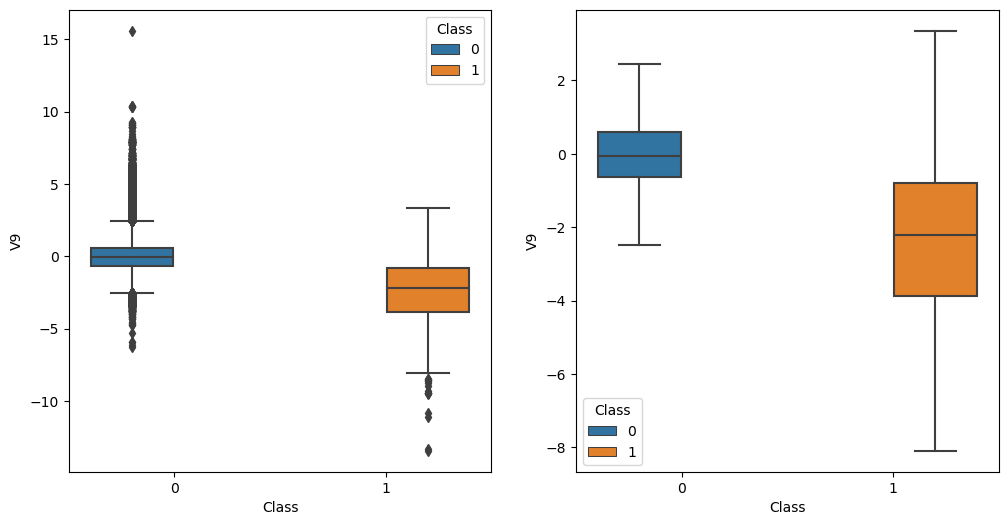

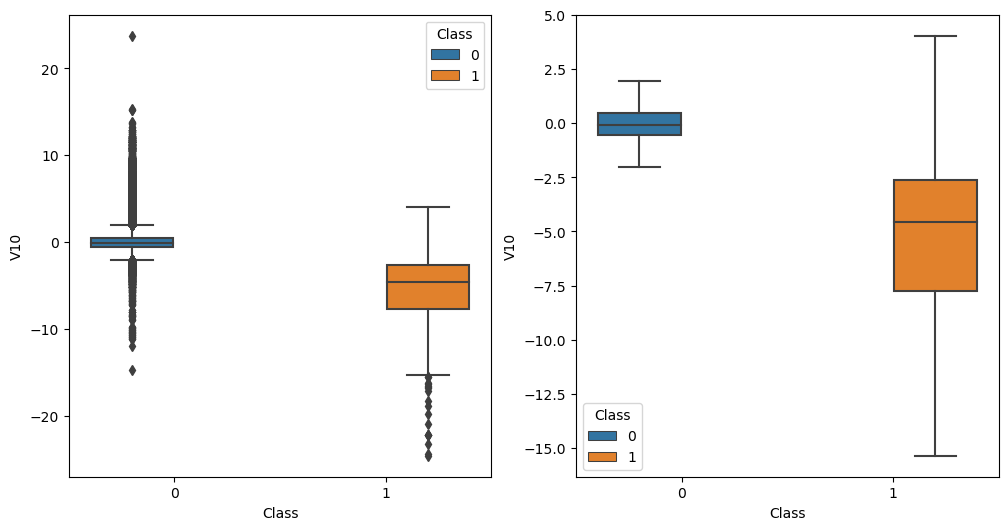

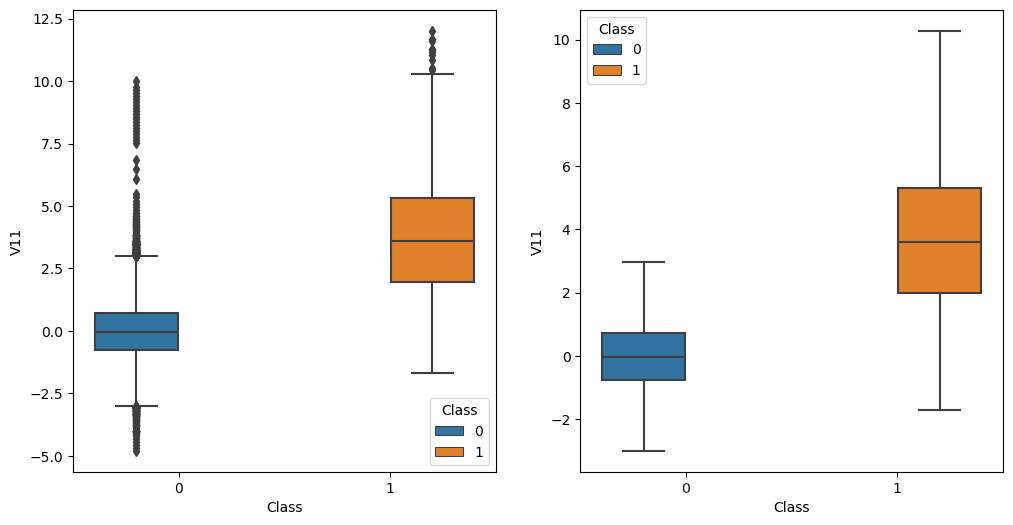

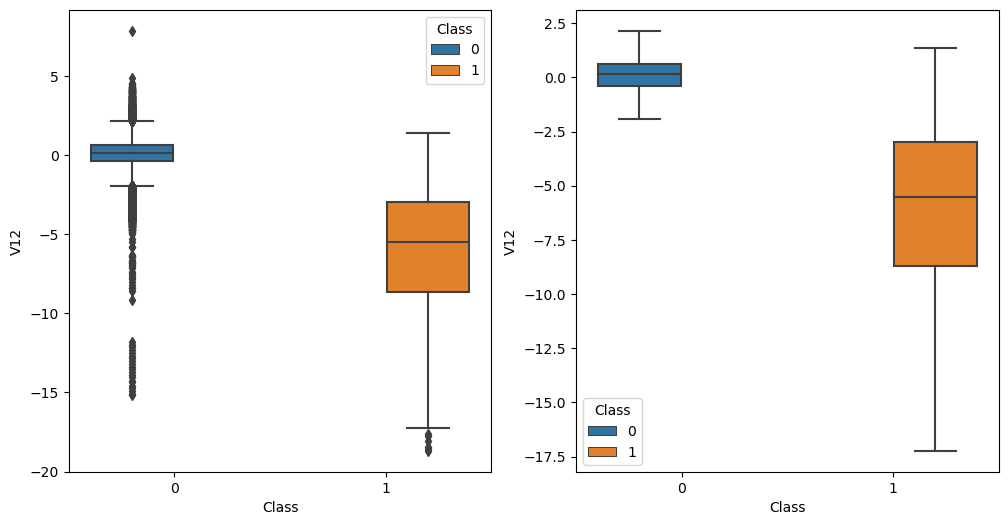

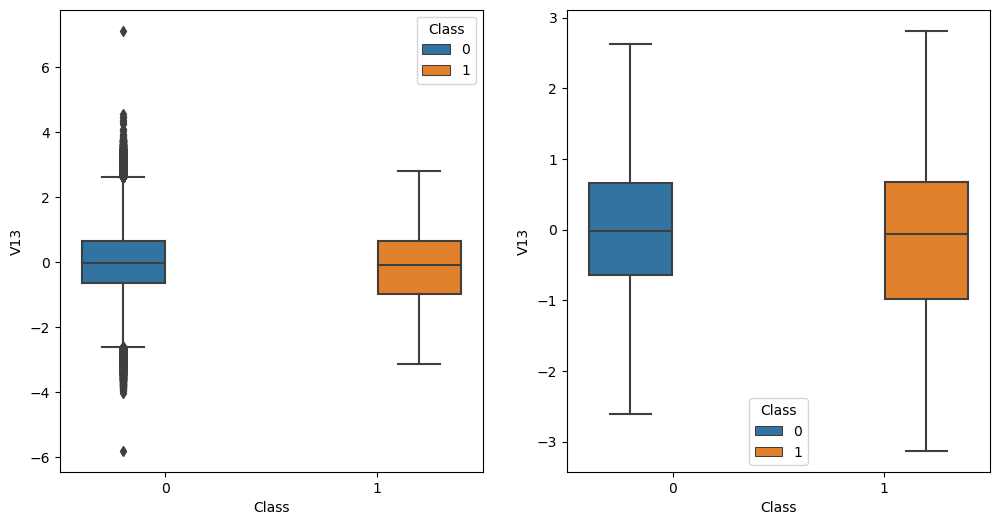

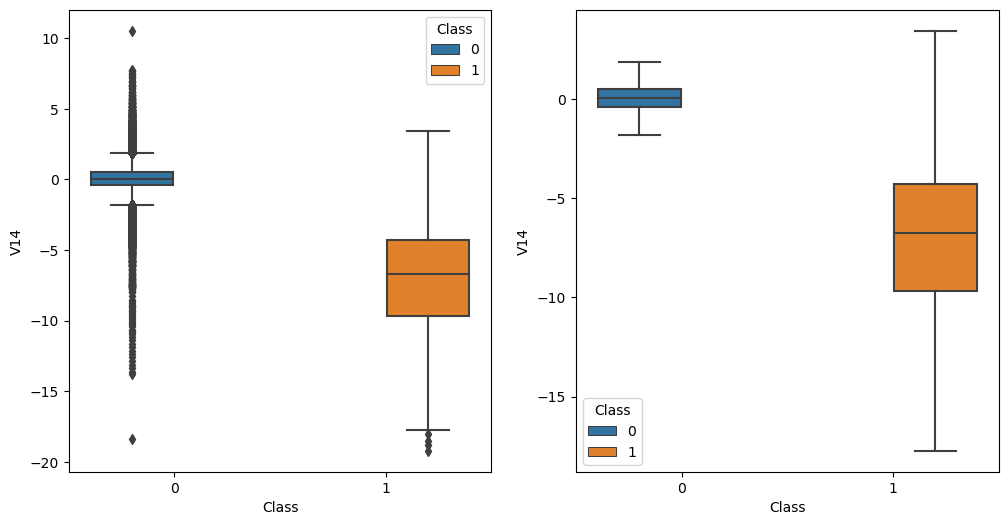

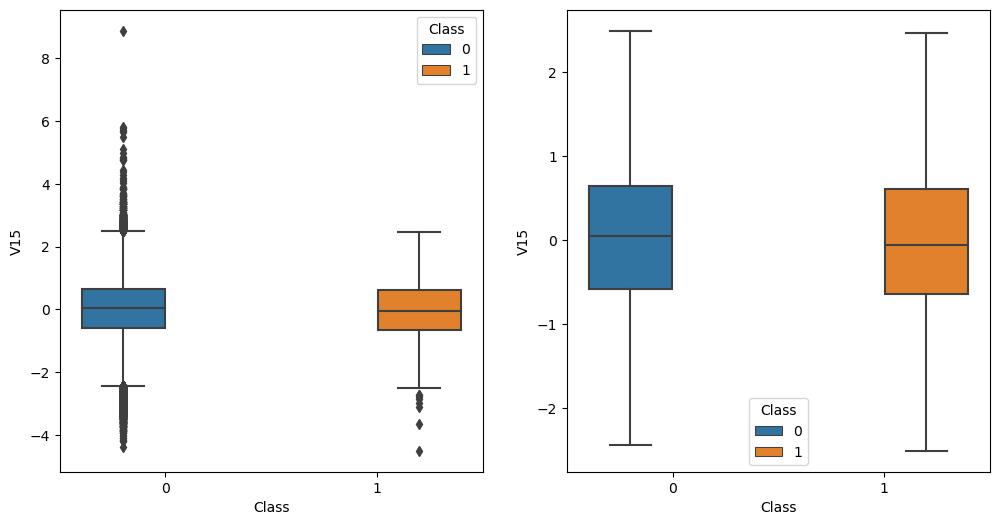

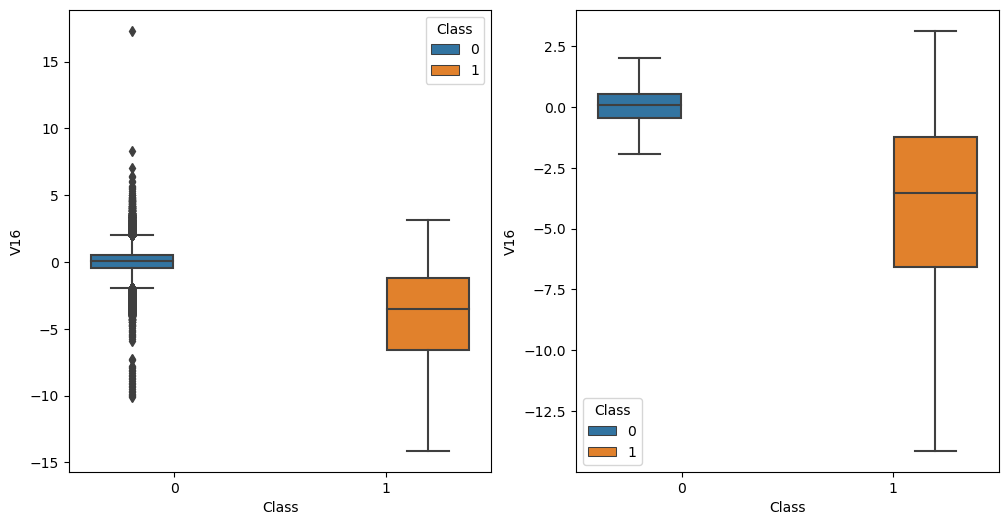

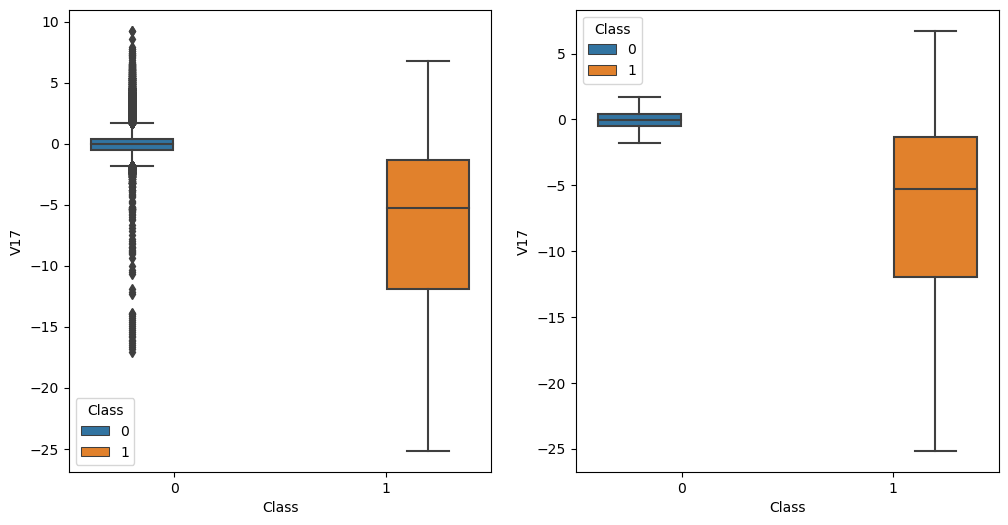

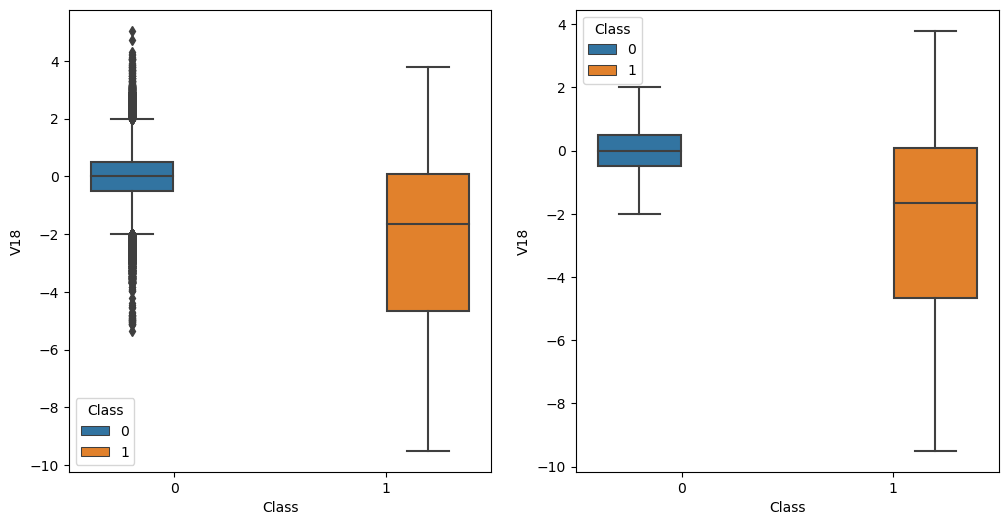

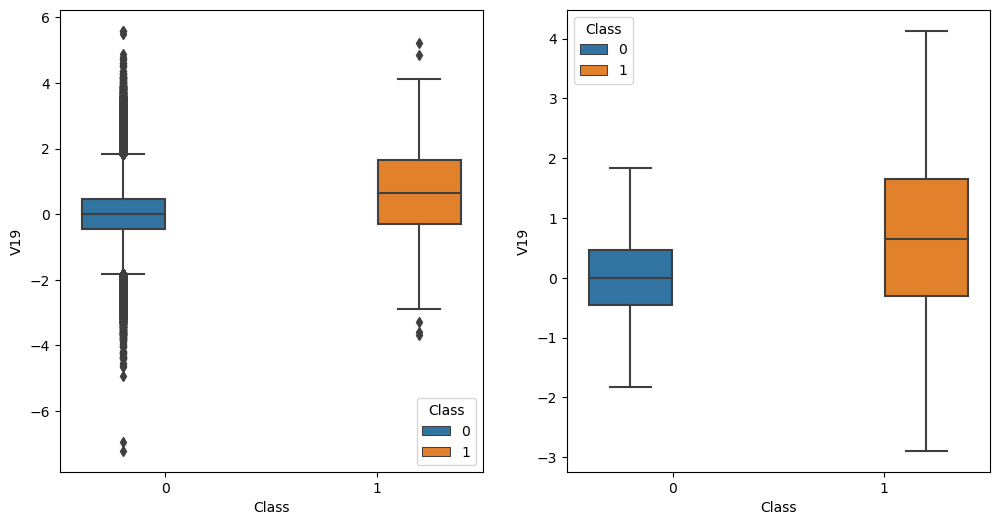

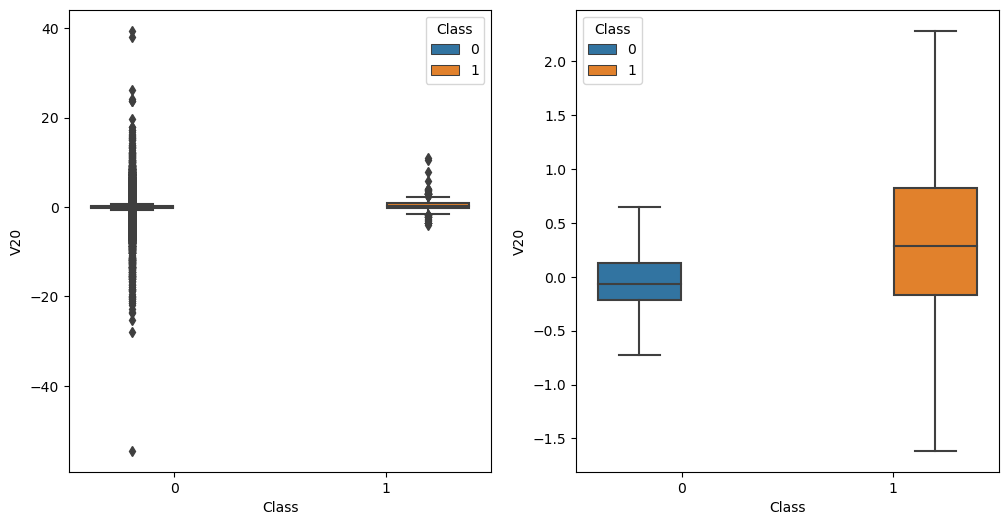

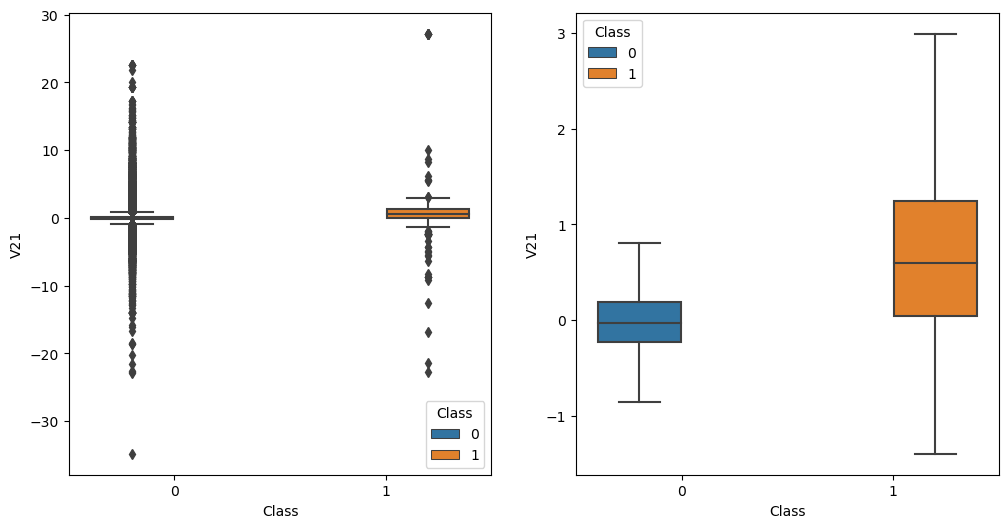

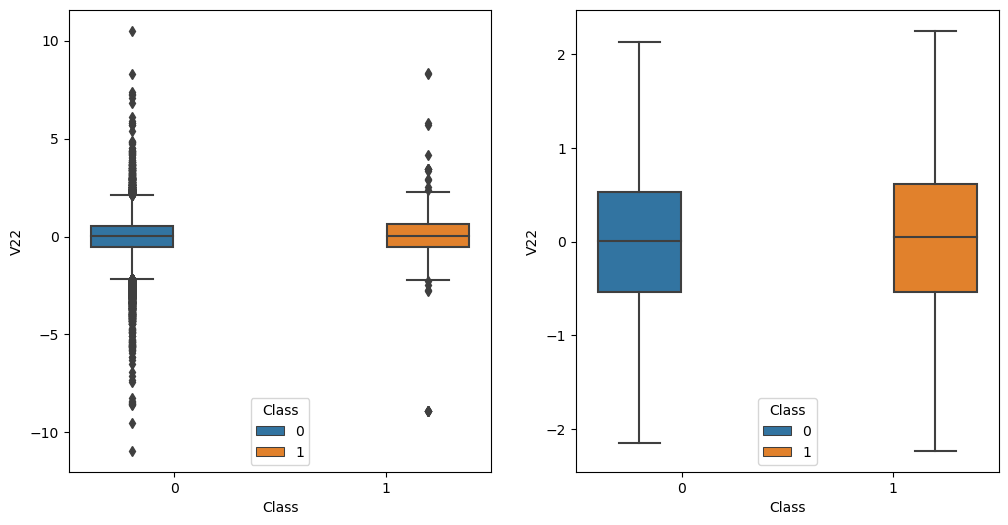

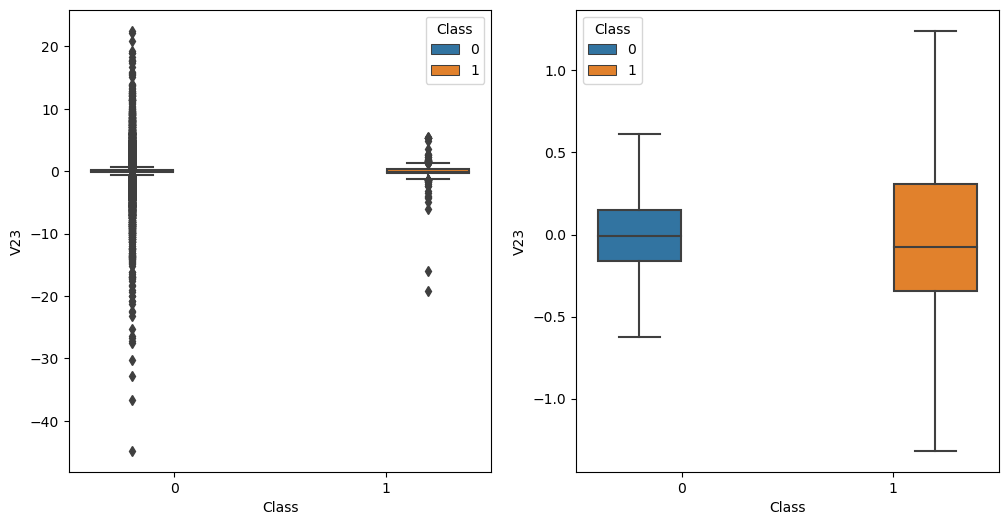

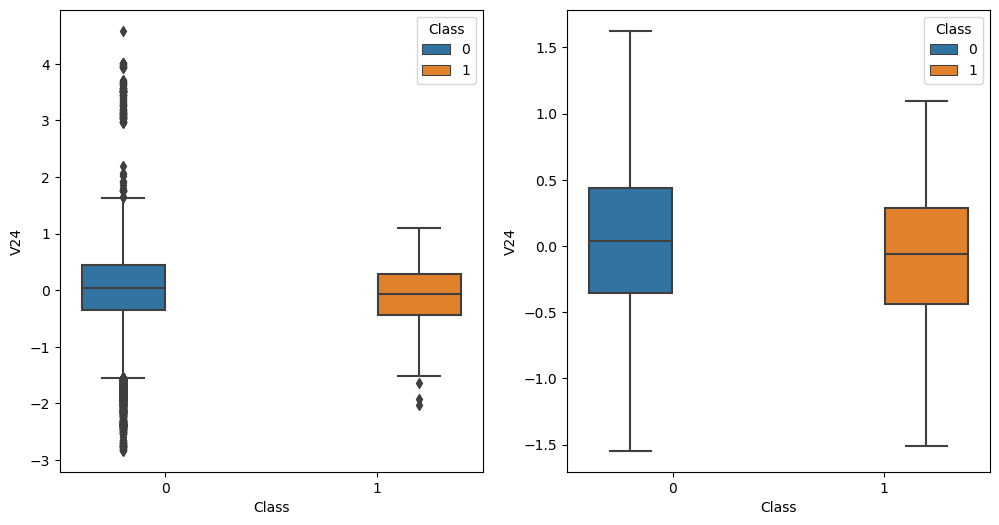

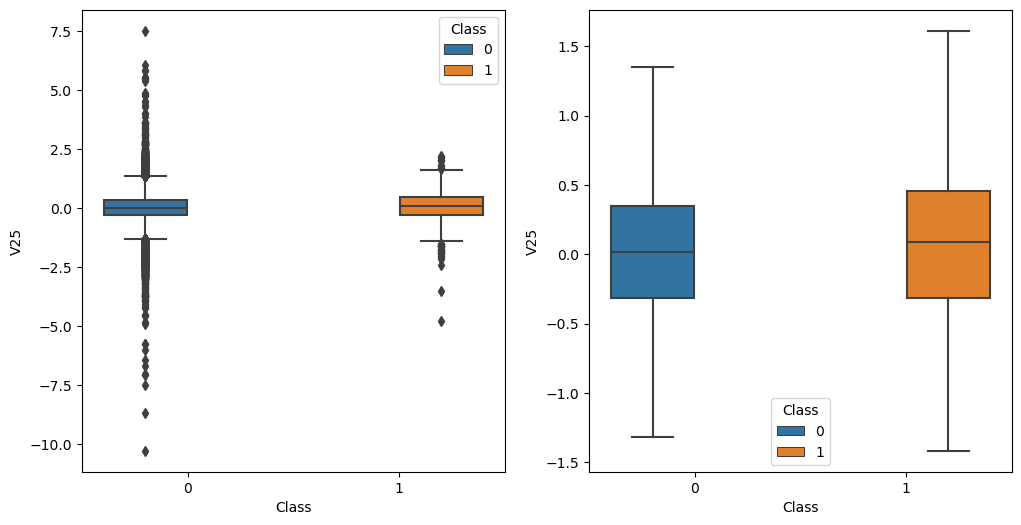

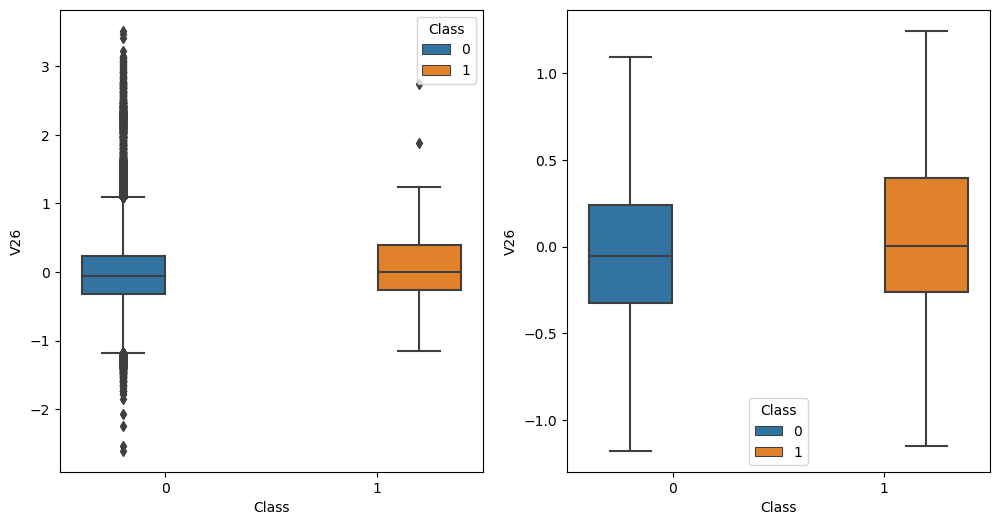

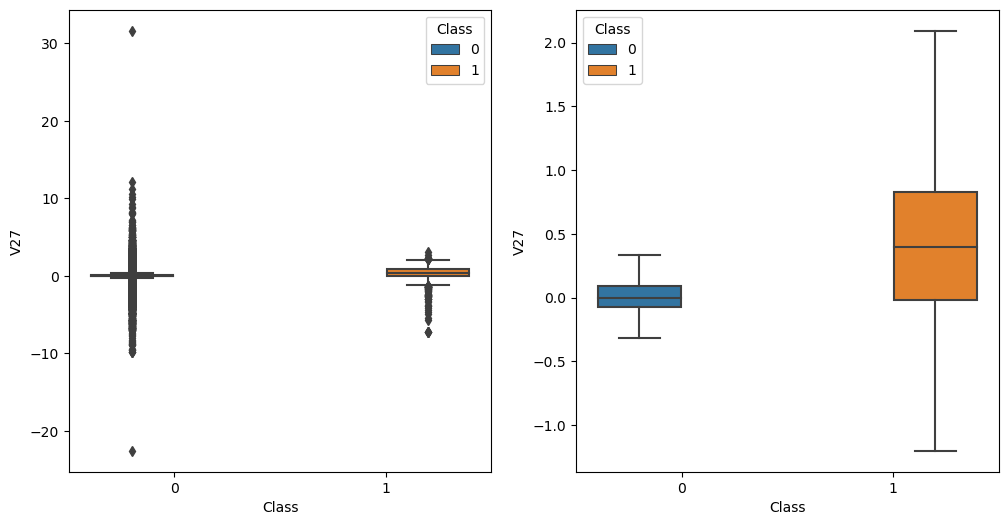

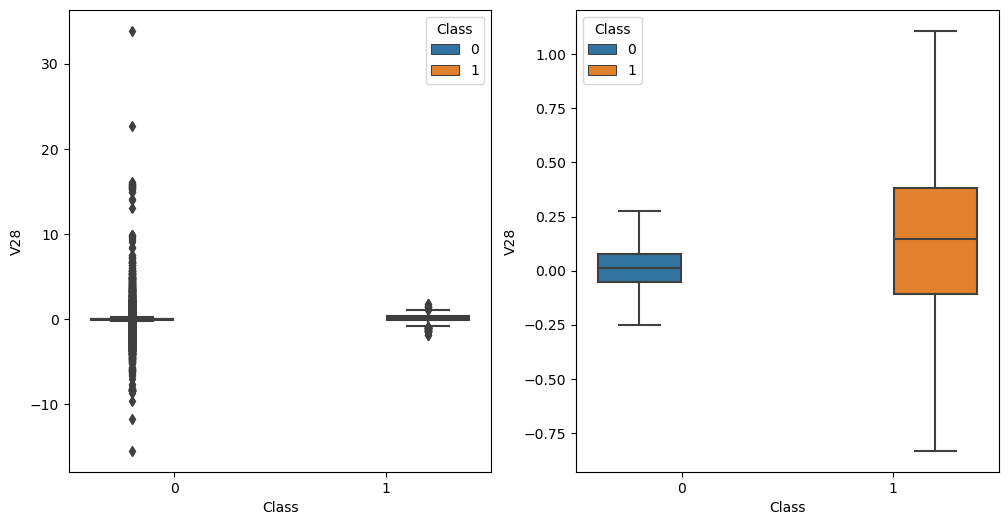

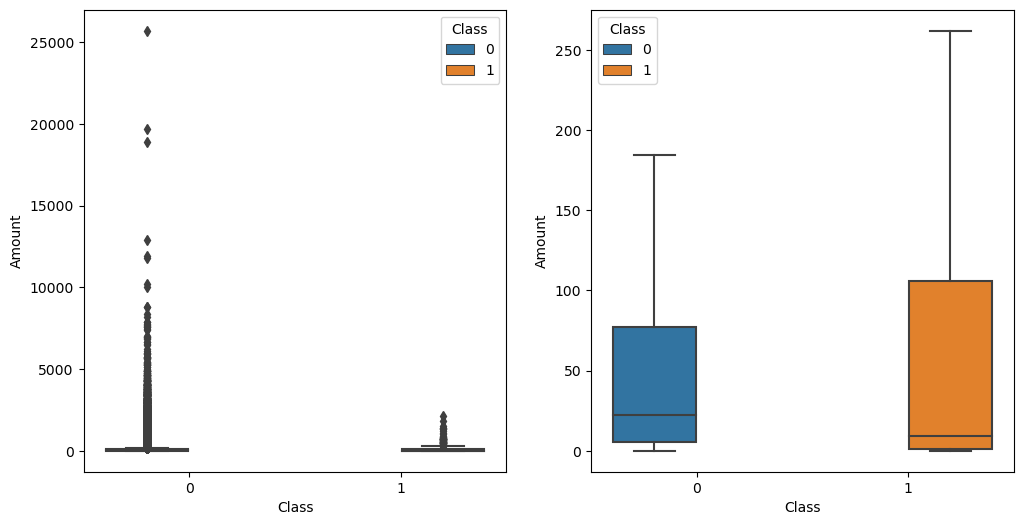

In [21]:
# Transaction amount 
data=df.copy()
data.drop(columns=['Class'], inplace = True)
for i in data.columns:
  fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
  s = sns.boxplot(ax = ax1, x="Class", y=i, hue="Class",data=df, showfliers=True)
  s = sns.boxplot(ax = ax2, x="Class", y=i, hue="Class",data=df, showfliers=False)
  plt.show();

#### The box plot analysis reveals that fraudulent transactions exhibit a higher number of outliers compared to non-fraudulent transactions. Given the significant class imbalance in our data, where fraudulent instances are scarce, opting to retain outliers without transformation is preferred to avoid information loss.

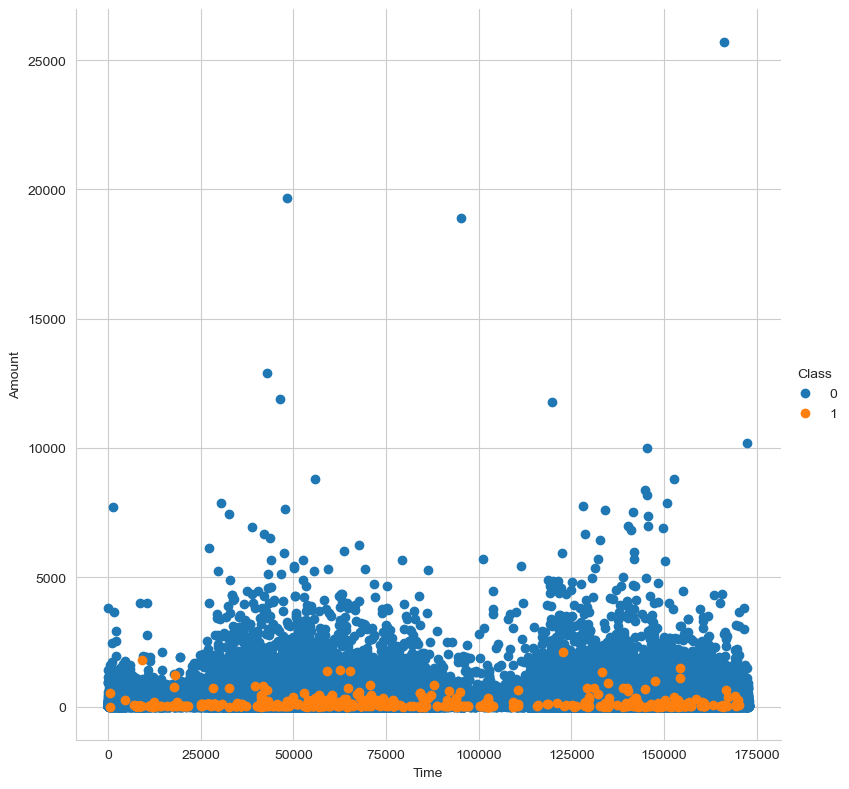

In [22]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Class", height = 8).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

#### The plot indicates a distinct pattern: fraudulent transactions are exclusively associated with transaction amounts below approximately 2500 units, while those exceeding this threshold show no instances of fraud. Regarding time distribution, fraud occurrences appear evenly spread across the recorded time periods.

### Splitting the data into train & test data

In [23]:
# Time is unnecessary here, we will drop the Time column
df.drop(['Time'], axis = 1, inplace= True)

#### Lets split the data into features and target columns

In [24]:
x = df.drop(['Class'], axis=1)
y = df['Class']

In [25]:
transform = PowerTransformer()
x_scaled = transform.fit_transform(x)

**PowerTransformer()** function is used for transforming features by applying power transformations. This transformation is helpful in cases where the data exhibits skewness or non-normality, aiming to make the distribution of features more Gaussian-like or symmetric. This can lead to improved model performance and interpretability.

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state=12)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((227845, 29), (56962, 29), (227845,), (56962,))

### Model Evaluation

#### We have to build a classification model to predict whether a transaction is fraudulent or not.

#### Logistic Regression

In [28]:
log_reg = LogisticRegression(random_state = 12)

log_reg.fit(x_train, y_train)
log_reg_pred_test = log_reg.predict(x_test)

class_report_log_reg = classification_report(y_test, log_reg_pred_test, target_names = ['Normal', 'Fraud'])

In [29]:
print("Logistic Regression Classification Report:")
print(class_report_log_reg)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56869
       Fraud       0.85      0.62      0.72        93

    accuracy                           1.00     56962
   macro avg       0.93      0.81      0.86     56962
weighted avg       1.00      1.00      1.00     56962



While the model demonstrates satisfactory overall accuracy, there is room for enhancement, particularly in its ability to detect fraudulent transactions, where recall rates could be improved.

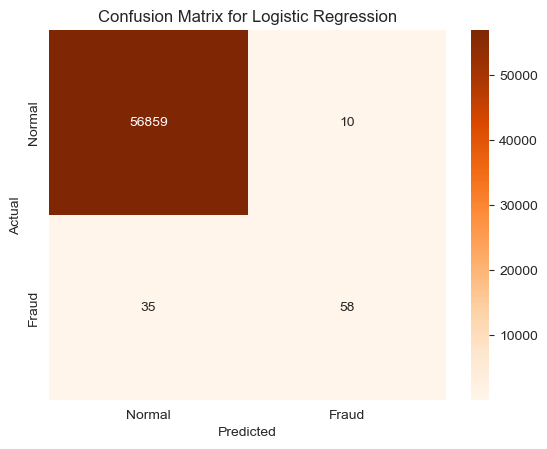

In [30]:
cm = confusion_matrix(y_test, log_reg_pred_test)
labels = ['Normal', 'Fraud']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

#### KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(x_train, y_train)
knn_pred_test = knn.predict(x_test)

class_report_knn_test = classification_report(y_test, knn_pred_test, target_names = ['Normal', 'Fraud'])

C:\Users\srashid\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [32]:
print("KNN Classification Report:")
print(class_report_knn_test)

KNN Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56869
       Fraud       0.96      0.77      0.86        93

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



While the model demonstrates satisfactory overall accuracy, there is room for enhancement, particularly in its ability to detect fraudulent transactions, where recall rates could be improved.

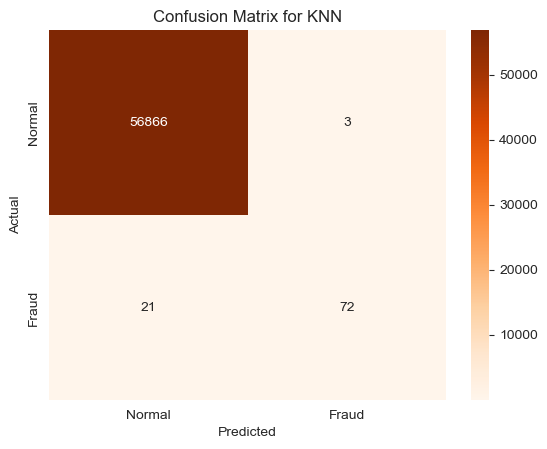

In [33]:
cm = confusion_matrix(y_test, knn_pred_test)
labels = ['Normal', 'Fraud']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

#### XGBoost

In [34]:
xgb = xgb.XGBClassifier(random_state = 12)

xgb.fit(x_train, y_train)
xgb_pred_test = xgb.predict(x_test)

class_report_xgb_test = classification_report(y_test, xgb_pred_test, target_names = ['Normal', 'Fraud'])

In [35]:
print("XGBoost Classification Report:")
print(class_report_xgb_test)

XGBoost Classification Report:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56869
       Fraud       0.95      0.80      0.87        93

    accuracy                           1.00     56962
   macro avg       0.97      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



While the model demonstrates satisfactory overall accuracy, there is room for enhancement, particularly in its ability to detect fraudulent transactions, where recall rates could be improved.

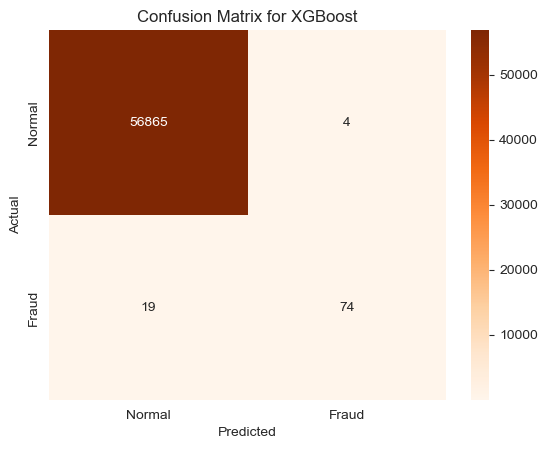

In [36]:
cm = confusion_matrix(y_test, xgb_pred_test)
labels = ['Normal', 'Fraud']
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for XGBoost')
plt.show()

### ROC Curve

In [37]:
lr_probs = log_reg.predict_proba(x_test)[:, 1]
knn_probs = knn.predict_proba(x_test)[:, 1]
xgb_probs = xgb.predict_proba(x_test)[:, 1]

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)

lr_auc = roc_auc_score(y_test, lr_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

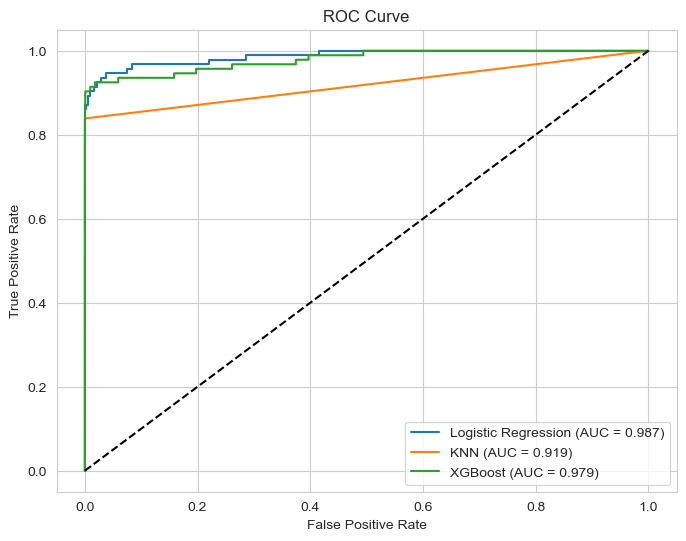

In [38]:
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.3f})')
plt.plot(knn_fpr, knn_tpr, label=f'KNN (AUC = {knn_auc:.3f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

- Upon analyzing the classification reports and AUC scores, it is evident that Logistic Regression and XGBoost emerge as the top-performing models for this task. These models exhibit strong overall accuracy and robust fraud detection capabilities, as indicated by their high recall scores.

- **Logistic Regression** achieves the highest **AUC score** of 0.987, surpassing both **XGBoost** with a score of 0.979 and **KNN** with a score of 0.919. This suggests that **Logistic Regression** and **XGBoost** exhibit superior capability in discriminating between fraudulent and non-fraudulent transactions, outperforming **KNN** in this regard.

- Considering the outcomes obtained, our suggestion would be to opt for either **Logistic Regression** or **XGBoost** for addressing this issue. The decision between these models can be fine-tuned by considering factors like computational demands and the level of interpretability desired.

### Lets Handle Imbalanced Data

#### Oversampling

In [39]:
rand_ov_samp = RandomOverSampler(random_state=0)
x_train_oversampled, y_train_oversampled = rand_ov_samp.fit_resample(x_train, y_train)

In [40]:
log_reg_oversampled = log_reg
log_reg_oversampled.fit(x_train_oversampled, y_train_oversampled)
log_reg_pred_oversampled = log_reg_oversampled.predict(x_test)

In [41]:
print("Logistic Regression Classification Report for Oversampled Data:")
print(classification_report(y_test, log_reg_pred_oversampled, target_names = ['Normal', 'Fraud']))

Logistic Regression Classification Report for Oversampled Data:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.99     56869
       Fraud       0.05      0.94      0.10        93

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



In [42]:
xgb_oversampled = xgb
xgb_oversampled.fit(x_train_oversampled, y_train_oversampled)
xgb_pred_oversampled = xgb_oversampled.predict(x_test)

In [43]:
print("XGBoosting Classification Report for Oversampled Data:")
print(classification_report(y_test, xgb_pred_oversampled, target_names = ['Normal', 'Fraud']))

XGBoosting Classification Report for Oversampled Data:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56869
       Fraud       0.90      0.81      0.85        93

    accuracy                           1.00     56962
   macro avg       0.95      0.90      0.93     56962
weighted avg       1.00      1.00      1.00     56962



#### Undersample

In [44]:
rand_und_samp = RandomUnderSampler(random_state=0)
x_train_undersampled, y_train_undersampled = rand_und_samp.fit_resample(x_train, y_train)

In [45]:
log_reg_undersampled = log_reg
log_reg_undersampled.fit(x_train_undersampled, y_train_undersampled)
log_reg_pred_undersampled = log_reg_undersampled.predict(x_test)

In [46]:
print("Logistic Regression Classification Report for Undersampled Data:")
print(classification_report(y_test, log_reg_pred_undersampled, target_names = ['Normal', 'Fraud']))

Logistic Regression Classification Report for Undersampled Data:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98     56869
       Fraud       0.04      0.92      0.08        93

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [47]:
xgb_undersampled = xgb
xgb_undersampled.fit(x_train_undersampled, y_train_undersampled)
xgb_pred_undersampled = xgb_undersampled.predict(x_test)

In [48]:
print("XGBoosting Classification Report for Undersampled Data:")
print(classification_report(y_test, xgb_pred_undersampled, target_names = ['Normal', 'Fraud']))

XGBoosting Classification Report for Undersampled Data:
              precision    recall  f1-score   support

      Normal       1.00      0.96      0.98     56869
       Fraud       0.04      0.91      0.08        93

    accuracy                           0.96     56962
   macro avg       0.52      0.94      0.53     56962
weighted avg       1.00      0.96      0.98     56962



#### Synthetic Minority Over-sampling Technique - SMOTE

In [49]:
smt = SMOTE(random_state=0)
x_train_smt, y_train_smt = smt.fit_resample(x_train, y_train)

In [50]:
log_reg_smt = log_reg
log_reg_smt.fit(x_train_smt, y_train_smt)
log_reg_pred_smt = log_reg_smt.predict(x_test)

In [51]:
print("Logistic Regression Classification Report for SMOTE Data:")
print(classification_report(y_test, log_reg_pred_smt, target_names = ['Normal', 'Fraud']))

Logistic Regression Classification Report for SMOTE Data:
              precision    recall  f1-score   support

      Normal       1.00      0.97      0.98     56869
       Fraud       0.05      0.92      0.09        93

    accuracy                           0.97     56962
   macro avg       0.52      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [52]:
xgb_smt = xgb
xgb_smt.fit(x_train_smt, y_train_smt)
xgb_pred_smt = xgb_smt.predict(x_test)

In [53]:
print("XGBoosting Classification Report for SMOTE Data:")
print(classification_report(y_test, xgb_pred_smt, target_names = ['Normal', 'Fraud']))

XGBoosting Classification Report for SMOTE Data:
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56869
       Fraud       0.78      0.85      0.81        93

    accuracy                           1.00     56962
   macro avg       0.89      0.92      0.91     56962
weighted avg       1.00      1.00      1.00     56962



**Logistic Regression:**

**Oversampled Data**: While the precision for fraud detection is notably low at 0.05, indicating a high rate of false positives, the model exhibits a commendably high recall of 0.94, successfully identifying a substantial portion of actual fraud cases. However, the overall F1-score is adversely affected by the imbalance between precision and recall.

**Undersampled Data**: Near to the oversampled data, the precision for fraud detection remains low at 0.04, accompanied by a high recall of 0.92. Consequently, the F1-score remains diminished due to the imbalanced nature of precision and recall.

**SMOTE Data**: Despite employing SMOTE, the precision for fraud detection remains persistently low at 0.05. However, there's a slight decrease in recall compared to oversampled data. Consequently, the F1-score remains suboptimal due to the ongoing imbalance between precision and recall.

**XGBoost:**

**Oversampled Data**: The model exhibits improved precision for fraud detection at 0.90, surpassing that of logistic regression. Moreover, it maintains a commendable recall of 0.81, resulting in a higher F1-score and a better balance between precision and recall compared to logistic regression.

**Undersampled Data**: Despite maintaining a low precision for fraud detection at 0.04, akin to logistic regression, the model demonstrates a lower recall of 0.91. It also achieves a similar F1-score compared to logistic regression.

**SMOTE Data**: While precision for fraud detection slightly dips to 0.78 compared to oversampled data, the model exhibits a slightly higher recall of 0.85. Nonetheless, the F1-score remains relatively high, indicating a favorable balance between precision and recall.

**Summary:**

According to the classification reports, **XGBoost** emerges as the top performer when combined with the oversampling technique. In the oversampled data scenario, **XGBoost** consistently outperformed both undersampled and SMOTE data, achieving the highest precision, recall, and F1-score in detecting fraudulent activity.

### Hyperparameter tuning

In [54]:
k_fold = StratifiedKFold(n_splits=5, random_state=12, shuffle=True)

In [55]:
class_report_list = []
for train_index, test_index in k_fold.split(x_train_oversampled, y_train_oversampled):
    x_train_fold, x_test_fold = x_train_oversampled[train_index], x_train_oversampled[test_index]
    y_train_fold, y_test_fold = y_train_oversampled[train_index], y_train_oversampled[test_index]
    xgb.fit(x_train_fold, y_train_fold)
    y_pred_fold = xgb.predict(x_test_fold)
    class_report_list.append(classification_report(y_test_fold, y_pred_fold, target_names = ['Normal', 'Fraud']))

In [56]:
print("XGBoost Classification Report with Stratified K_Fold:\n")
for report in class_report_list:
  print(report)

XGBoost Classification Report with Stratified K_Fold:

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     45490
       Fraud       1.00      1.00      1.00     45489

    accuracy                           1.00     90979
   macro avg       1.00      1.00      1.00     90979
weighted avg       1.00      1.00      1.00     90979

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     45489
       Fraud       1.00      1.00      1.00     45490

    accuracy                           1.00     90979
   macro avg       1.00      1.00      1.00     90979
weighted avg       1.00      1.00      1.00     90979

              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     45489
       Fraud       1.00      1.00      1.00     45489

    accuracy                           1.00     90978
   macro avg       1.00      1.00      1.00     90978
weighted avg       

The examination of classification reports leads to the determination that employing **XGBoost** in conjunction with **oversampled data and stratified k-fold cross-validation** yields optimal results for identifying fraudulent transactions. This strategy consistently delivers high precision, recall, and F1-scores across numerous folds, showcasing its reliability and efficacy in addressing imbalanced data challenges and ensuring precise predictions.

## Conclusion

Given the outcomes observed, it appears that the combination of XGBoost model, Random Oversampling, and StratifiedKFold Cross-Validation has yielded the most promising results. By systematically adjusting the hyperparameters, we aim to enhance the model's ability to accurately detect fraudulent transactions, thereby optimizing its effectiveness in real-world applications.